In [2]:
import pandas as pd 
import numpy as np 
import scipy
from matplotlib.colors import ListedColormap
import scikit_posthocs
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
sns.set(font_scale=1.4)
matplotlib.rcParams['pdf.fonttype'] = 42
import pybedtools

In [12]:
# Load up Juncbase results
s34fkv12_contrast_table = pd.read_csv('/Desktop/nojcnonly_named_s34fkv12.csv')
s34flacz_contrast_table = pd.read_csv('/Desktop/nojcnonly_named_s34flacz.csv')
wtkv12_contrast_table = pd.read_csv('/Desktop/nojcnonly_named_wtkv12.csv')

In [13]:
# Filtering and dataframe manipulation for s34fkv12
s34fkv12_contrast_table_filter= s34fkv12_contrast_table [['GeneName', 'delta_val','corrected_pval']]
s34fkv12_contrast_table_filter = s34fkv12_contrast_table_filter.rename(columns={'GeneName': '#Gene'})
s34fkv12_contrast_table_filter = s34fkv12_contrast_table_filter[s34fkv12_contrast_table_filter['corrected_pval'] < 0.25]
s34fkv12_contrast_table_filter['delta_val_abs'] = s34fkv12_contrast_table_filter['delta_val'].abs()
s34fkv12_contrast_table_filter.drop(columns = ['delta_val'], inplace = True)
s34fkv12_contrast_table_filter

,#Gene,corrected_pval,delta_val_abs
3,KYAT3,0.241260,8.43
9,GUK1,0.196018,1.28
27,LAMP2,0.033924,3.63
40,DERL2,0.045922,10.96
53,NAF1,0.196018,2.16
...,...,...,...
25736,NOP2,0.234832,12.07
25737,MPDU1,0.062691,12.34
25738,CDK13,0.055217,13.95
25739,CHD4,0.039049,12.28


In [14]:
# Filtering and dataframe manipulation for s34flacz
s34flacz_contrast_table_filter= s34flacz_contrast_table [['GeneName', 'delta_val', 'corrected_pval']]
s34flacz_contrast_table_filter = s34flacz_contrast_table_filter.rename(columns={'GeneName': '#Gene'})
s34flacz_contrast_table_filter = s34flacz_contrast_table_filter[s34flacz_contrast_table_filter['corrected_pval'] < 0.25]
s34flacz_contrast_table_filter['delta_val_abs'] = s34flacz_contrast_table_filter['delta_val'].abs()
s34flacz_contrast_table_filter.drop(columns = ['delta_val'], inplace = True)
s34flacz_contrast_table_filter

,#Gene,corrected_pval,delta_val_abs
6,STX7,0.011324,10.32
7,FMR1,0.008591,2.14
13,BCL2L13,0.124226,8.41
15,TBL2,0.182406,2.22
24,TMEM184C,0.092692,7.28
...,...,...,...
25272,PRICKLE1,0.162098,20.22
25273,NOP2,0.028181,22.48
25274,FAH,0.156084,10.10
25275,ICE1,0.084592,13.59


In [15]:
# Filtering and dataframe manipulation for wtkv12
wtkv12_contrast_table_filter= wtkv12_contrast_table [['GeneName', 'delta_val', 'corrected_pval']]
wtkv12_contrast_table_filter = wtkv12_contrast_table_filter.rename(columns={'GeneName': '#Gene'})
wtkv12_contrast_table_filter = wtkv12_contrast_table_filter[wtkv12_contrast_table_filter['corrected_pval'] < 0.25]
wtkv12_contrast_table_filter['delta_val_abs'] = wtkv12_contrast_table_filter['delta_val'].abs()
wtkv12_contrast_table_filter.drop(columns = ['delta_val'], inplace = True)
wtkv12_contrast_table_filter

,#Gene,corrected_pval,delta_val_abs
7403,CDK7,0.119529,3.26


In [16]:
#converting the gene ids into into gene names
with open ('/Users/selammehreteab/Desktop/gencode.v33.primary_assembly.annotation.gtf') as f:
    gtf = list(f)

gtf = [x for x in gtf if not x.startswith('#')]
gtf = [x for x in gtf if 'gene_name "' in x]

#grab everything that has gene ID and gene name
#only get lines with gene id and gene name
# gtf = [x for x in gtf if 'gene id "' in x and 'gene_name "' in x]
gtf_list = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
gtfset = set(gtf_list)
gtfdict = dict(gtfset)
len(gtfset)

60721

In [17]:
#Mapping gene names to gene Ids
dflist = [s34fkv12_contrast_table_filter, s34flacz_contrast_table_filter, wtkv12_contrast_table_filter]


for df in dflist:
    df['GeneName'] = df['#Gene'].map(gtfdict)
    df.drop(columns = ['GeneName'], inplace = True)

In [18]:
# some more filtering and sorting by descending abs val of delta val for GSEA for s34f lacz
s34flacz_contrast_table_filter = s34flacz_contrast_table_filter.loc[s34flacz_contrast_table_filter.groupby('#Gene')['corrected_pval'].idxmin()]
s34flacz_contrast_table_filter = s34flacz_contrast_table_filter[['#Gene', 'delta_val_abs', 'corrected_pval']]
s34flacz_contrast_table_filter = s34flacz_contrast_table_filter.sort_values(by='delta_val_abs', ascending=False)
s34flacz_contrast_table_filter

,#Gene,delta_val_abs,corrected_pval
10156,PRR3,60.73,0.009032
24886,CASP8,53.33,0.000044
20604,ODF2L,49.22,0.000178
14876,ZNF827,46.14,0.014171
21674,MPP5,45.30,0.000247
...,...,...,...
9127,PHGDH,0.74,0.238425
2869,VDAC1,0.72,0.145936
13946,GNPNAT1,0.68,0.160575
1229,SHMT1,0.64,0.209517


In [19]:
# some more filtering and sorting by descending abs val of delta val for GSEA for s34f kv12
s34fkv12_contrast_table_filter = s34fkv12_contrast_table_filter.loc[s34fkv12_contrast_table_filter.groupby('#Gene')['corrected_pval'].idxmin()]
s34fkv12_contrast_table_filter = s34fkv12_contrast_table_filter[['#Gene', 'delta_val_abs', 'corrected_pval']]
s34fkv12_contrast_table_filter = s34fkv12_contrast_table_filter.sort_values(by='delta_val_abs', ascending=False)
s34fkv12_contrast_table_filter

,#Gene,delta_val_abs,corrected_pval
12286,PRR3,50.15,0.051754
22439,MAGED2,46.06,0.001449
4820,RGS3,45.00,0.065338
25732,CASP8,38.64,0.007156
11288,EXOG,36.06,0.085701
...,...,...,...
21622,SPINT1,0.81,0.184574
14301,SLC25A46,0.81,0.248327
14198,UGGT1,0.67,0.212298
13930,SPATS2L,0.64,0.194191


In [20]:
# some more filtering and sorting by descending abs val of delta val for GSEA for wt kv12
wtkv12_contrast_table_filter = wtkv12_contrast_table_filter.loc[wtkv12_contrast_table_filter.groupby('#Gene')['corrected_pval'].idxmin()]
wtkv12_contrast_table_filter = wtkv12_contrast_table_filter[['#Gene', 'delta_val_abs', 'corrected_pval']]
wtkv12_contrast_table_filter = wtkv12_contrast_table_filter.sort_values(by='delta_val_abs', ascending=False)
wtkv12_contrast_table_filter

,#Gene,delta_val_abs,corrected_pval
7403,CDK7,3.26,0.119529


In [35]:
#generate rnk files
s34fkv12_contrast_table_filter.to_csv('s34fkv12_psi.RNK', sep = '\t', index = False)
s34flacz_contrast_table_filter.to_csv('s34flacz_psi.RNK', sep='\t', index = False)
wtkv12_contrast_table_filter.to_csv('wtkv12_psi.RNK', sep='\t', index = False)

### Hallmark Gene Set Enrichment Analysis Heatmap

In [28]:
# Load up GSEA results for hallmark gene set analysis
s34flacz_pos = pd.read_csv('/Users/selammehreteab/gsea_home/output/mar18/my_analysis.GseaPreranked.1742362062554/gsea_report_for_na_pos_1742362062554.tsv', sep='\t')
s34fkv12_pos = pd.read_csv('/Users/selammehreteab/gsea_home/output/mar18/my_analysis.GseaPreranked.1742362070294/gsea_report_for_na_pos_1742362070294.tsv', sep='\t')


In [29]:
# prepping dataframe to plot the heatmap of hallmark gene set analysis results
dflist = [s34flacz_pos,s34fkv12_pos]
for df in dflist:
    df = df.rename(columns = {'NAME':'Gene Set'}, inplace =True)
    s34flacz_pos['Comparison'] = 'S34F LACZ'
    s34fkv12_pos['Comparison'] = 'S34F KV12'


In [30]:
# concatenate both dataframes
s34flacz_s34fkv12 = pd.concat([s34flacz_pos,s34fkv12_pos], ignore_index = True)

In [31]:
# drop the columns that are unnecessary
dfs = [s34flacz_s34fkv12]
for df in dfs:
    df = df.drop(['GS<br> follow link to MSigDB','GS DETAILS','SIZE','ES','FWER p-val', 'RANK AT MAX',
                 'LEADING EDGE', 'Unnamed: 11'], axis=1, inplace=False)

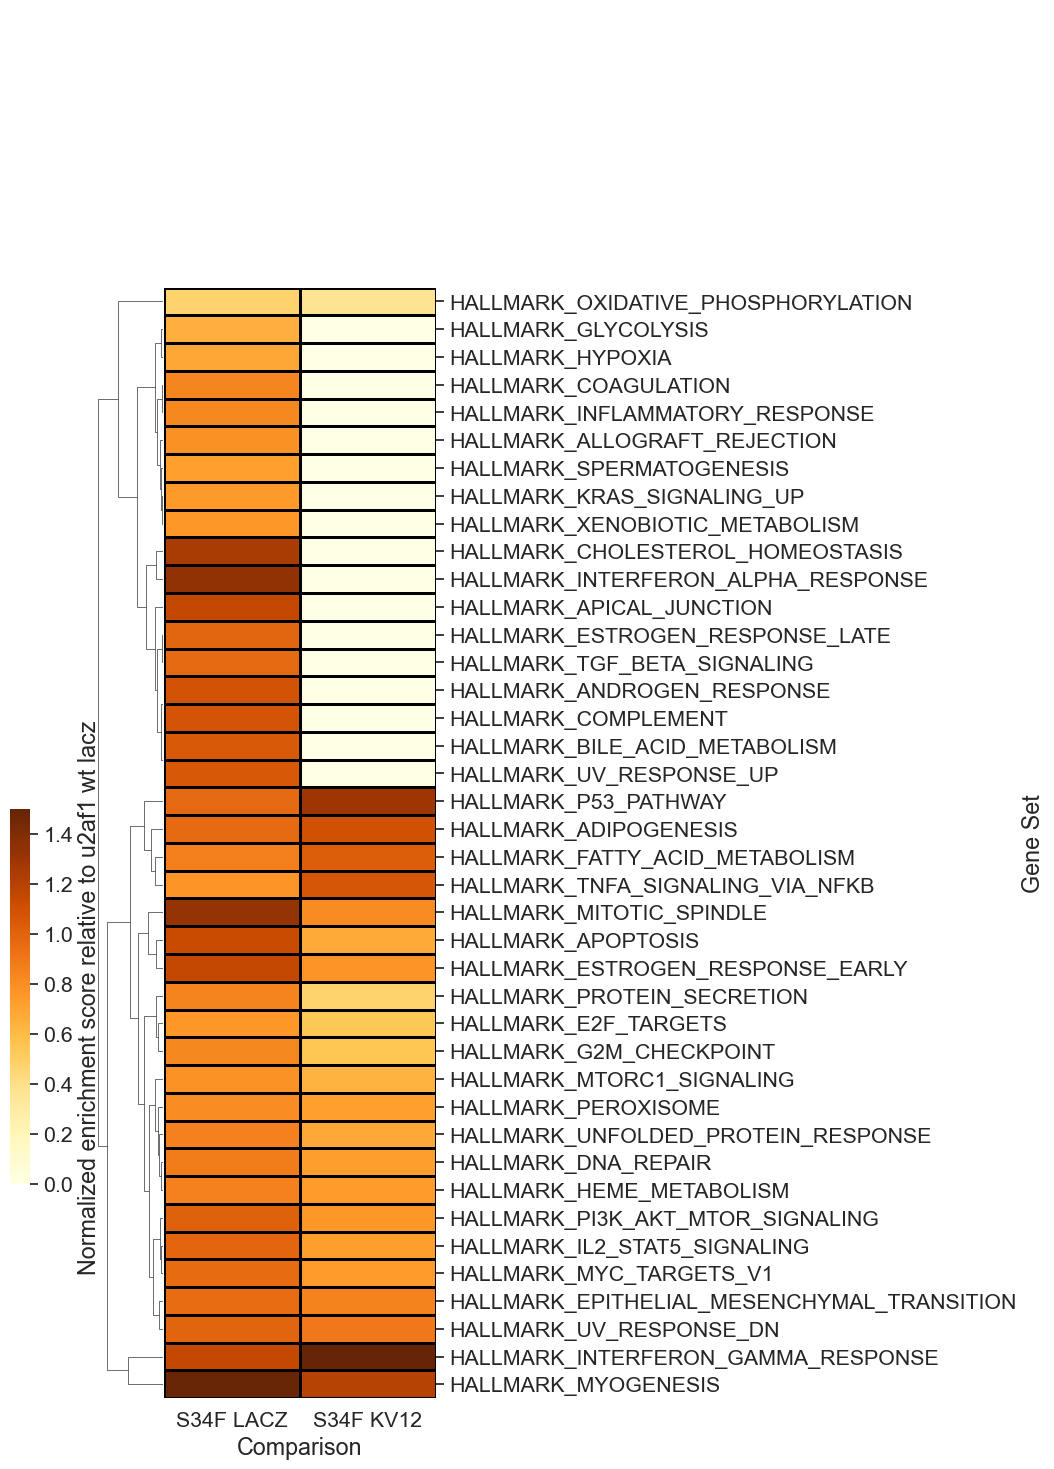

In [35]:
# heatmap of hallmark gene set analysis
heatmap_s34flacz = pd.pivot_table(s34flacz_s34fkv12, values = 'NES', index = 'Gene Set', columns = 'Comparison')

reordering_column = ['S34F LACZ', 'S34F KV12']
heatmap_s34flacz = heatmap_s34flacz.reindex(reordering_column, axis=1)

heatmap_s34flacz = heatmap_s34flacz.fillna(0)

heatmap = sns.clustermap(
    heatmap_s34flacz, figsize=(10, 15), xticklabels=True, yticklabels=True, col_cluster=False, 
    linecolor='black', linewidths=1, annot_kws={"size": 25}, 
    cmap=sns.color_palette("YlOrBr", as_cmap=True), 
    cbar_kws={'label': 'Normalized enrichment score relative to u2af1 wt lacz'},
    vmin=0, vmax=1.5
)

# Move the color bar to the left
heatmap.ax_cbar.set_position([-0.06, 0.2, 0.02, 0.25])  # (x, y, width, height)

# Save the figure
plt.savefig(
    "/Users/selammehreteab/Downloads/bothclones_Juncbase_heatmap.pdf", 
    format='pdf', transparent=True, bbox_inches='tight', dpi=600
)



### Stress Granule Gene Set Enrichment Analysis Heatmap

In [3]:
#  Load up GSEA results for stress granule gene set analysis
sg_s34fkv12_pos = pd.read_csv('/Users/selammehreteab/gsea_home/output/mar19/my_analysis.GseaPreranked.1742421895563/gsea_report_for_na_pos_1742421895563.tsv', sep='\t')
sg_s34flacz_pos = pd.read_csv('/Users/selammehreteab/gsea_home/output/mar19/my_analysis.GseaPreranked.1742421902531/gsea_report_for_na_pos_1742421902531.tsv', sep='\t')
# s34flacz_pos

In [4]:
# prepping dataframe to plot the heatmap of stress granule gene set analysis results
dflist = [sg_s34flacz_pos,sg_s34fkv12_pos]
for df in dflist:
    df = df.rename(columns = {'NAME':'Gene Set'}, inplace =True)
    sg_s34flacz_pos['Comparison'] = 'S34F LACZ'
    sg_s34fkv12_pos['Comparison'] = 'S34F KV12'

In [5]:
# concatenate both dataframes
sg_s34flacz_s34fkv12 = pd.concat([sg_s34flacz_pos,sg_s34fkv12_pos], ignore_index = True)

In [6]:
# drop the unnecessary columns
dfs = [sg_s34flacz_s34fkv12]
for df in dfs:
    df = df.drop(['GS<br> follow link to MSigDB','GS DETAILS','SIZE','ES','FWER p-val', 'RANK AT MAX',
                 'LEADING EDGE', 'Unnamed: 11'], axis=1, inplace=False)

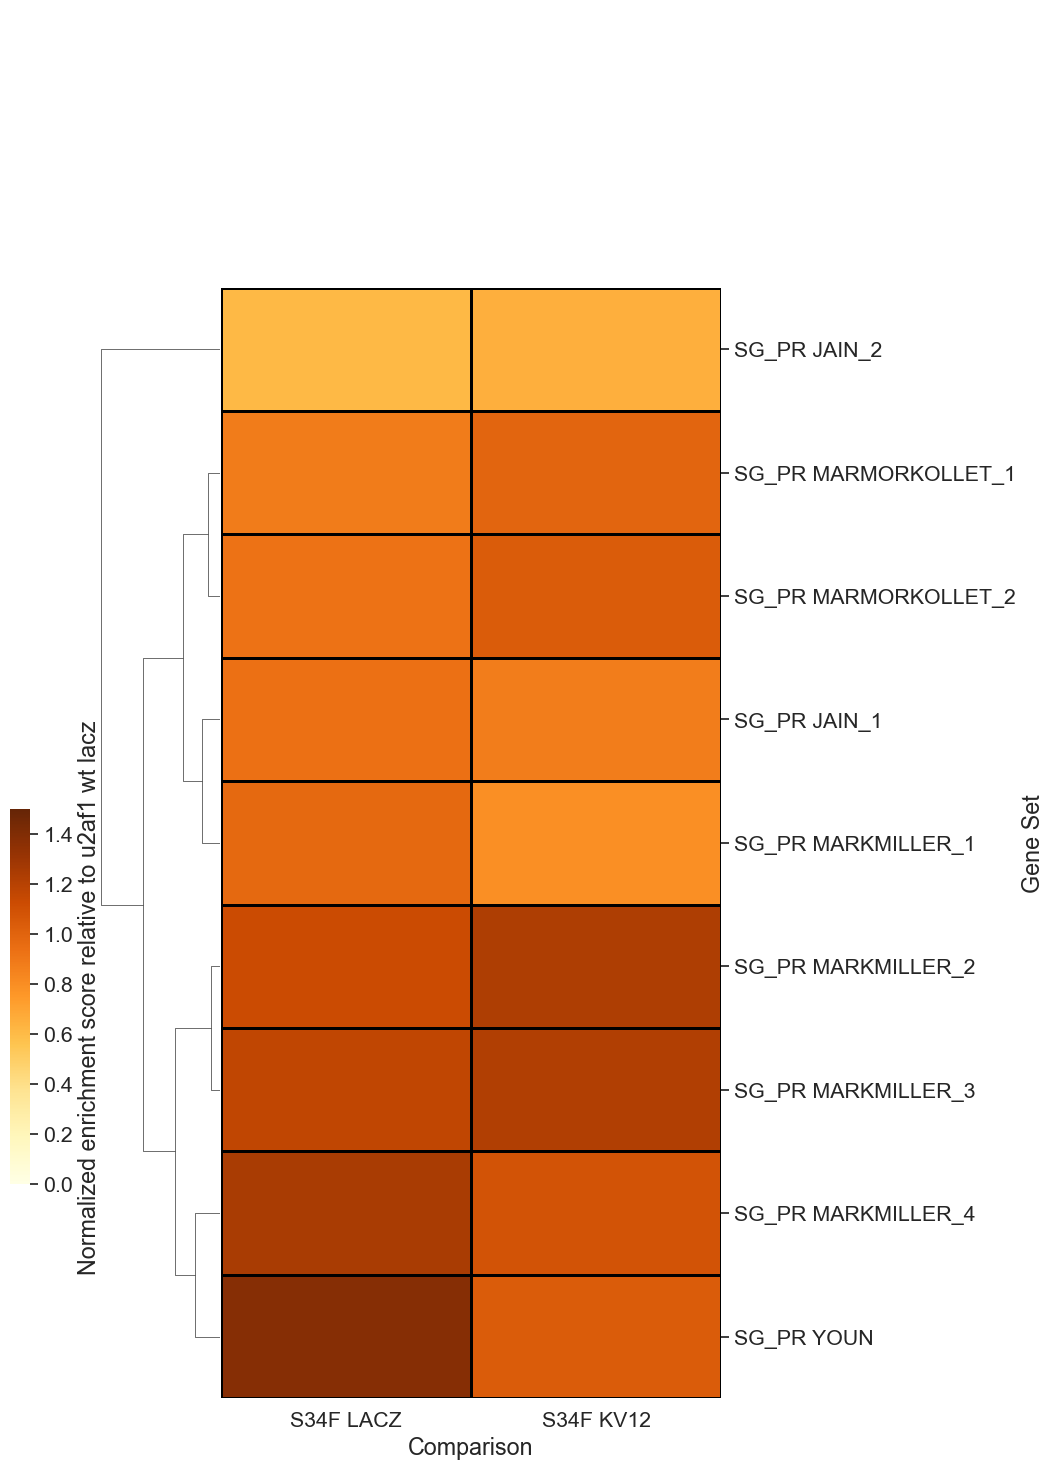

In [36]:
# heatmap of stress granule gene set analysis
sg_heatmap_s34flacz = pd.pivot_table(sg_s34flacz_s34fkv12, values = 'NES', index = 'Gene Set', columns = 'Comparison')

reordering_column = ['S34F LACZ', 'S34F KV12']
sg_heatmap_s34flacz = sg_heatmap_s34flacz.reindex(reordering_column, axis=1)

sg_heatmap_s34flacz = sg_heatmap_s34flacz.fillna(0)

heatmap = sns.clustermap(
    sg_heatmap_s34flacz, figsize=(10, 15), xticklabels=True, yticklabels=True, col_cluster=False, 
    linecolor='black', linewidths=1, annot_kws={"size": 25}, 
    cmap=sns.color_palette("YlOrBr", as_cmap=True), 
    cbar_kws={'label': 'Normalized enrichment score relative to u2af1 wt lacz'},
    vmin=0, vmax=1.5
)

# Move the color bar to the left
heatmap.ax_cbar.set_position([-0.06, 0.2, 0.02, 0.25])  # (x, y, width, height)

heatmap.figure.savefig(
    "/Users/selammehreteab/Downloads/sg_bothclones_Juncbase_heatmap.pdf",
    format='pdf',
    transparent=True,
    bbox_inches='tight',  # Ensures full figure is saved
    dpi=600  # Improves resolution
)